<div style="border:solid green 2px; padding: 20px">
<b>Привет, Роман!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

The version of the notebook server is: 6.1.4

The server is running on this version of Python: Python 3.8.5

OS Windows 10 Home

Configurable nbextensions Table of Contents (2) compatibility: 4.x, 5.x (https://www.codegrepper.com/code-examples/shell/install+toc2+jupyter+notebook)

<b>Описание проекта:</b>

<b>Прогнозирование температуры звезды</b>

Вам пришла задача от обсерватории «Небо на ладони»: придумать, как с помощью нейросети определять температуру на поверхности обнаруженных звёзд. 

<b>Обычно для расчёта температуры учёные пользуются следующими методами:</b>

* Закон смещения Вина.

* Закон Стефана-Больцмана.

* Спектральный анализ.

Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.

В базе обсерватории есть характеристики уже изученных 240 звёзд.

In [1]:
print("Hello World"*100)

Hello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello WorldHello Worl

Импортируем модули и библиотеки:

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки работы с графиками
import numpy as np # импорт библиотеки для вычислений
import warnings

warnings.filterwarnings('ignore') # отключаем сообщения об ошибках pandas
pd.set_option('display.max_columns', None) # Сброс ограничений на число выводимых столбцов

from sklearn.model_selection import train_test_split # импорт метода для разделения таблицы
from sklearn.preprocessing import StandardScaler # импорт метода для массштабирования данных
import torch.nn as nn # импорт библиотеки для построения нейросети
import torch
from torchmetrics import MeanSquaredError as mse
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error as msem
import random
from math import ceil

## Исследование данных

### Открываем файл с данными и анализируем содержимое

Функция для чтения файла в таблицу с учетом возможности работы на разных платформах и заодно исследование данных в таблицах:

In [2]:
def read_csv(link):
    link1 = 'datasets/' + link
    link2 = '/datasets/' + link
    try:
        name_link = pd.read_csv(link1)
    except:
        name_link = pd.read_csv(link2)
    print('просмотрим первые пять строк')
    display(name_link.head())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('просмотрим информацию')
    display(name_link.info())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('посчитаем уникальные значения')
    display(name_link.nunique()) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверим имена столбцов')
    display(name_link.columns) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверка на явные дубликаты')
    display('Количество явных дубликатов:', name_link.duplicated().sum()) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверим численные данные')
    display(name_link.describe()) 
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('проверим корреляции')
    display(name_link.corr())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    return name_link

In [3]:
df = read_csv('6_class.csv')

просмотрим первые пять строк


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
просмотрим информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


None

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
посчитаем уникальные значения


Unnamed: 0                240
Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
dtype: int64

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверим имена столбцов


Index(['Unnamed: 0', 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color'],
      dtype='object')

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверка на явные дубликаты


'Количество явных дубликатов:'

0

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверим численные данные


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,119.50000,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,69.42622,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,0.00000,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,59.75000,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,119.50000,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,179.25000,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,239.00000,40000.000000,849420.000000,1948.500000,20.060000,5.000000


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
проверим корреляции


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Unnamed: 0,1.000000,0.391056,0.322719,0.167608,-0.257015,0.246505
Temperature (K),0.391056,1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.322719,0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.167608,0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.257015,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.246505,0.411129,0.676845,0.660975,-0.955276,1.000000


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Таблица содержит 240 строк - маловато данных для нормального обучения нейросети

колонка Unnamed: 0 явно дублирует индексы ее можно удалить


<b>Признаки для обучения</b>


Luminosity(L/Lo) - Относительная светимость L/Lo — светимость звезды относительно Солнца. ТИП - float64

Radius(R/Ro) - Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.ТИП - float64

Absolute magnitude(Mv)  - Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.ТИП - float64

Star color - Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа. ТИП  - object

Star type - Тип звезды. ТИП - int64 
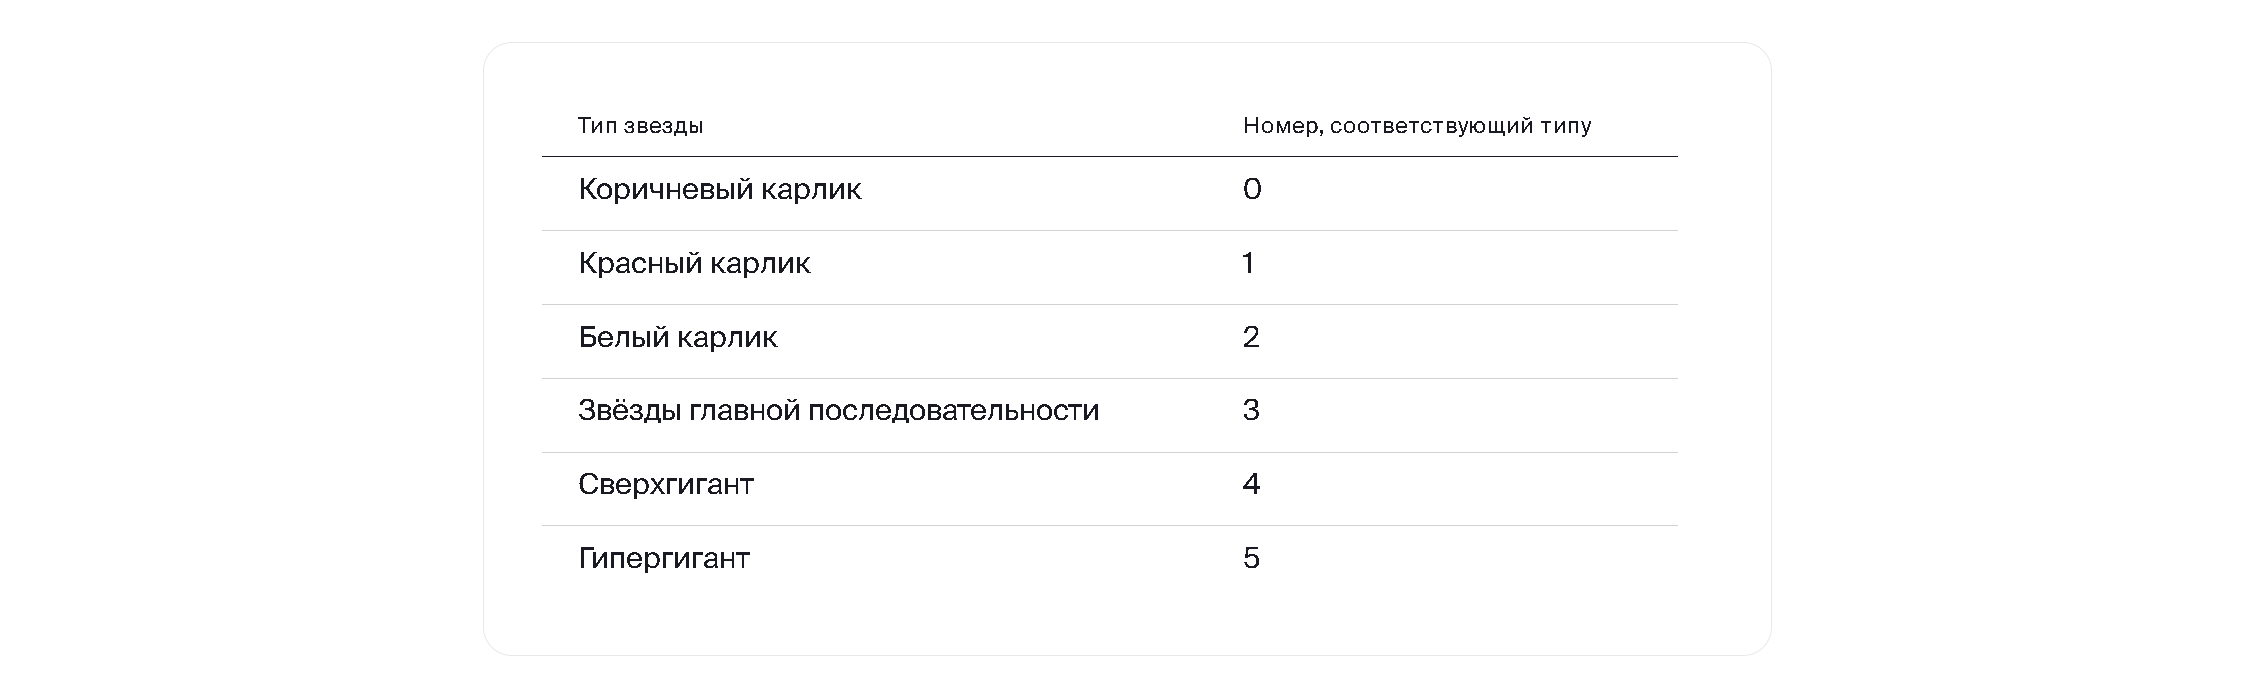





<b>Целевой признак</b>

Temperature (K) - Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах. ТИП - int64 



<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Поддерживаю, описание проекта важная часть</div>

### Посмотрим на распределения: Построение гистограмм

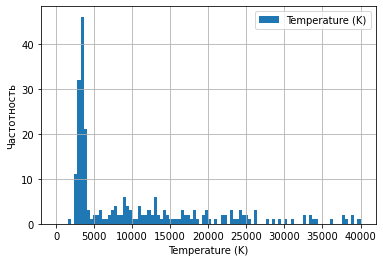

In [4]:
plt.hist(df['Temperature (K)'], range = (0, 40000), bins=100, label = 'Temperature (K)')
plt.ylabel('Частотность')
plt.xlabel('Temperature (K)')
plt.legend()
plt.grid()

<b>Большинство звезд с температурой около 3000 К

Посчитаем количество строк с температурами ну скажем выше 20000 К

In [5]:
display(df[df['Temperature (K)'] >20000].count())

Unnamed: 0                40
Temperature (K)           40
Luminosity(L/Lo)          40
Radius(R/Ro)              40
Absolute magnitude(Mv)    40
Star type                 40
Star color                40
dtype: int64

ТО есть 200 звезд до 20000 К и 40 звезд выше. Для горячих звезд явно будет не хватать обучающей выборки

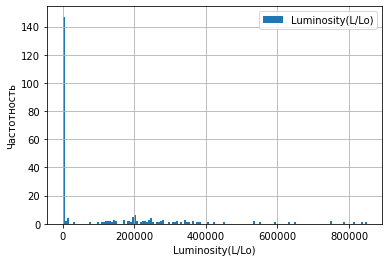

In [6]:
plt.hist(df['Luminosity(L/Lo)'], range = (0, 850000), bins=150, label = 'Luminosity(L/Lo)')
plt.ylabel('Частотность')
plt.xlabel('Luminosity(L/Lo)')
plt.legend()
plt.grid()

<b>Явное скопление светимостей около нуля, помотрим пристальнее:

In [7]:
display(df[df['Luminosity(L/Lo)'] < 0.1])

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.17000,16.12,0,Red
1,1,3042,0.000500,0.15420,16.60,0,Red
2,2,2600,0.000300,0.10200,18.70,0,Red
3,3,2800,0.000200,0.16000,16.65,0,Red
4,4,1939,0.000138,0.10300,20.06,0,Red
...,...,...,...,...,...,...,...
205,205,19920,0.001560,0.01420,11.34,2,Blue
206,206,24020,0.001590,0.01270,10.55,2,Blue
207,207,23092,0.001320,0.01040,10.18,2,Blue
208,208,17920,0.001110,0.01060,11.66,2,Blue


<b>Мда уж 209 из 240 звезд почти не светятся - тут весьма мало данных для ярких звезд

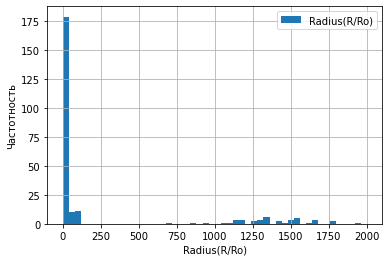

In [8]:
plt.hist(df['Radius(R/Ro)'], range = (0, 2000), bins=50, label = 'Radius(R/Ro)')
plt.ylabel('Частотность')
plt.xlabel('Radius(R/Ro)')
plt.legend()
plt.grid()

<b>Большинство звезд с радиусом близким к Солнцу или не сильно большие, посмотрим внимательнее

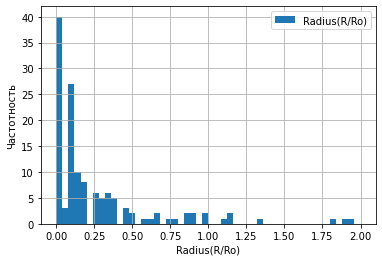

In [9]:
plt.hist(df['Radius(R/Ro)'], range = (0, 2), bins=50, label = 'Radius(R/Ro)')
plt.ylabel('Частотность')
plt.xlabel('Radius(R/Ro)')
plt.legend()
plt.grid()

Посмотрим на звезды меньше солнца

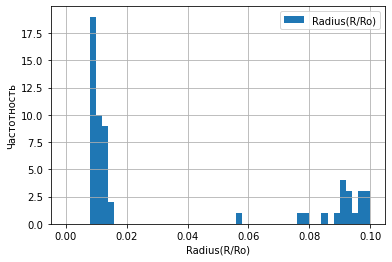

In [10]:
plt.hist(df['Radius(R/Ro)'], range = (0, 0.1), bins=50, label = 'Radius(R/Ro)')
plt.ylabel('Частотность')
plt.xlabel('Radius(R/Ro)')
plt.legend()
plt.grid()

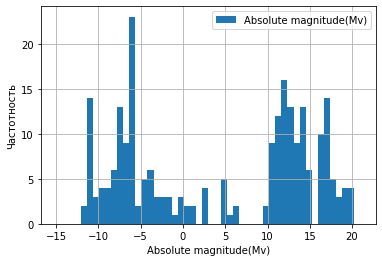

In [11]:
plt.hist(df['Absolute magnitude(Mv)'], range = (-15, 21), bins=50, label = 'Absolute magnitude(Mv)')
plt.ylabel('Частотность')
plt.xlabel('Absolute magnitude(Mv)')
plt.legend()
plt.grid()

<b>Наблюдаются две области скопления показателей: в районе 15 и -7 Mv

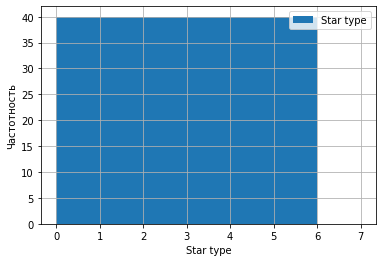

In [12]:
plt.hist(df['Star type'], range = (0, 7), bins=7, label = 'Star type')
plt.ylabel('Частотность')
plt.xlabel('Star type')
plt.legend()
plt.grid()

сранный график, посчитаем уникальные значения.

In [13]:
df['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

<b>Ну здесь вообще весьма странная подборка по типу - ибо другие данные явно тяготеют к  показателям Солнца и не наблюдается разбиение по показателям, а тут по типу как то одинаково разбиты данные - тут вполне возможно закралась ошибка в определении типов, искуственно как то. Хотя судя по корреляции этот параметр весьма хорошо влияет на температуру звезды.

### Проверка на не явные дубликаты:

In [14]:
df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

Наблюдаются не явные дубликаты, следует переименовать некоторые значения, а именно приведем к следующим названиям:

Whitish Это White

Yellowish White - желтоватый, можно оставить просто Yellowish (тут же yellow-white и 'White-Yellow')

ИТОГО:

'Red', 'Blue-White', 'White', 'Yellowish', 'Pale-Yellow-Orange', 'Blue', 'Orange', 'Orange-Red'

'Red', 'White', 'Pale yellow orange', 'Orange', 'white','Orange-Red'

### <b>Выводы и замечания по анализу данных:</b>

* требуется переименование всех столбцов в формат snake_case (думаю единицы измерения вообще можно убрать из названий)
* пропусков и пустых значений в даных не наблюдается
* явных дубликатов нет
* проблем с минимальными и максимальными значениями нет
* температура хорошо коррелирует со всеми числовыми данными кроме относительного радиуса
* есть не явные дубликаты - требуется переименование
* столбец Unnamed: 0	можно удалить
* 240 строк данных это очень мало, для обучения нейросети хорошо бы увеличить количество строк данных
* в столбце Star color категориальные данные - требуется преобразование OHE
* масштаб данных в столбцах различный - требуется массштабирование данных

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>С рассуждениями твоими согласен:)</div>

## Предобработка данных по результатам анализа

### Удалим столбцы не влияющие на предсказания

In [15]:
df = df.drop(['Unnamed: 0'], axis=1)

In [16]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


### Переименование столбцов


In [17]:
display(df.columns)

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color'],
      dtype='object')

In [18]:
df.set_axis(['temperature', 'luminosity', 'radius', 'absolute_magnitude',
       'star_type', 'star_color'],axis = 'columns',inplace = True)

In [19]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


### Удаление не явных дубликатов

Напишем функцию замены

In [20]:
def replace(column, lists, word):
    for i in lists:
        df[column] = df[column].str.replace(i, word)

In [21]:
replace('star_color', ['Blue White', 'Blue white', 'Blue-white', 'Blue white ', 'Blue-White '], 'Blue-White')

In [22]:
replace('star_color', ['Yellowish White', 'Whitish', 'yellow-white', 'White-Yellow', 'yellowish'], 'Yellowish')

In [23]:
replace('star_color', ['Blue '], 'Blue')

In [24]:
replace('star_color', ['white'], 'White')

In [25]:
replace('star_color', ['Pale yellow orange'], 'Pale-Yellow-Orange')

In [26]:
df['star_color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish', 'Pale-Yellow-Orange',
       'Blue', 'Orange', 'Orange-Red'], dtype=object)

Теперь все в порядке, OHE даст нужные результаты

In [27]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


Выводы: необходимая предобработка данных произведена, теперь можно приступать к разделению на выборки,преобразованию категориальных данных и массштабированию данных

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Отлично, стало лучше</div>

## Разделение на выбрки, OHE , массштабирование

### Разделяем таблицу на признаки для обучения и на целевой признак


In [28]:
features = df.drop('temperature', axis=1)
target = df['temperature']

### OHE для признаков

In [29]:
features_ohe = pd.get_dummies(features, columns=['star_color'], drop_first=True)
features_ohe.head()

,luminosity,radius,absolute_magnitude,star_type,star_color_Blue-White,star_color_Orange,star_color_Orange-Red,star_color_Pale-Yellow-Orange,star_color_Red,star_color_White,star_color_Yellowish
0,0.002400,0.1700,16.12,0,0,0,0,0,1,0,0
1,0.000500,0.1542,16.60,0,0,0,0,0,1,0,0
2,0.000300,0.1020,18.70,0,0,0,0,0,1,0,0
3,0.000200,0.1600,16.65,0,0,0,0,0,1,0,0
4,0.000138,0.1030,20.06,0,0,0,0,0,1,0,0


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>drop_first на месте:)</div>

### Выделяем данные для обученияи тестовые данные

In [30]:
x_train, x_test, y_train, y_test = train_test_split(features_ohe, target, test_size=0.2,
                                                    shuffle=True, random_state=12345)

In [31]:
x_train.shape

(192, 11)

In [32]:
x_test.shape

(48, 11)

In [33]:
y_test.shape

(48,)

### Масштабирование признаков 

Обучение скейлера на тренировочной выборке

In [34]:
numeric = ['luminosity', 'radius', 'absolute_magnitude']

scaler = StandardScaler()

scaler.fit(x_train[numeric])

StandardScaler()

Масштабирование признаков

In [35]:
x_train[numeric] = scaler.transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Отмасштабировал корректно;)</div>

In [36]:
x_train.head()

,luminosity,radius,absolute_magnitude,star_type,star_color_Blue-White,star_color_Orange,star_color_Orange-Red,star_color_Pale-Yellow-Orange,star_color_Red,star_color_White,star_color_Yellowish
139,-0.573535,-0.425464,0.869405,1,0,0,0,0,1,0,0
14,-0.573535,-0.425707,0.626075,1,0,0,0,0,1,0,0
67,-0.573535,-0.425810,1.071862,0,0,0,0,0,1,0,0
17,-0.573535,-0.425014,0.532295,1,0,0,0,0,1,0,0
148,-0.573535,-0.425983,0.915244,2,0,0,0,0,0,1,0


данные подготовлены для построения модели нейросети


##  Построение простой модели нейронной сети — baseline

### Класс для задания архитектуры нейронной сети и параметры

In [37]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
        # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>За инициализацию весов лайк:) Вот тут еще можешь про них почитать:

+  https://towardsdatascience.com/understand-kaiming-initialization-and-implementation-detail-in-pytorch-f7aa967e9138


</div>

Задаем количество нейронов

In [38]:
net = Net(11, 20, 20, 1) 

Преобразование данных в тензоры

In [39]:
x_train_tensor = torch.FloatTensor(x_train.values)
x_test_tensor = torch.FloatTensor(x_test.values)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

Оптимизация

In [40]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

Функция потерь

In [41]:
loss = nn.L1Loss()# инициализируйте функцию потерь

### Прогон сети по эпохам обучения, нахождение предсказаний при минимуме RMSE

In [42]:
num_epochs = 4000
best_rmse = 10000
test_preds_best = 0

for epoch in range(num_epochs):
    optimizer.zero_grad()

    preds = net.forward(x_train_tensor).flatten()
    
    loss_value = loss(preds, y_train_tensor)
    
    loss_value.backward()

    optimizer.step()
    
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(x_test_tensor).flatten()
        
        rmse = mse()**0.5
        RMSE = rmse(test_preds, y_test_tensor)
    
        print(RMSE)
        
    if best_rmse > RMSE:
        best_rmse = torch.round(RMSE)
        test_preds_best = torch.round(test_preds)
        
print()        
print('Лучшее RMSE: ', best_rmse)
print()
print('Лучшее предсказание: ', test_preds_best)
print()
print('Тестовые данные: ', y_test_tensor)

tensor(15782.7490, grad_fn=<PowBackward0>)
tensor(11260.9287, grad_fn=<PowBackward0>)
tensor(7626.9502, grad_fn=<PowBackward0>)
tensor(6614.5737, grad_fn=<PowBackward0>)
tensor(6249.2754, grad_fn=<PowBackward0>)
tensor(5679.6460, grad_fn=<PowBackward0>)
tensor(5324.5146, grad_fn=<PowBackward0>)
tensor(5062.0742, grad_fn=<PowBackward0>)
tensor(4847.1670, grad_fn=<PowBackward0>)
tensor(4614.7148, grad_fn=<PowBackward0>)
tensor(4756.6372, grad_fn=<PowBackward0>)
tensor(4750.6528, grad_fn=<PowBackward0>)
tensor(4756.6626, grad_fn=<PowBackward0>)
tensor(4729.7251, grad_fn=<PowBackward0>)
tensor(4689.1470, grad_fn=<PowBackward0>)
tensor(4614.9141, grad_fn=<PowBackward0>)
tensor(4588.8481, grad_fn=<PowBackward0>)
tensor(4615.9731, grad_fn=<PowBackward0>)
tensor(4570.1836, grad_fn=<PowBackward0>)
tensor(4489.1895, grad_fn=<PowBackward0>)
tensor(4560.2871, grad_fn=<PowBackward0>)
tensor(4524.8530, grad_fn=<PowBackward0>)
tensor(4485.8838, grad_fn=<PowBackward0>)
tensor(4490.3564, grad_fn=<PowBa

In [43]:
from tqdm import tqdm
EPOCHS = 4000
best_rmse10 = 10000

with tqdm(total=len(range(EPOCHS))) as pbar:
    for i in range(EPOCHS):
            optimizer.zero_grad()
            preds = net(x_train_tensor).flatten()
            loss_value = loss(preds, y_train_tensor)
            loss_value.backward()
            optimizer.step()
            if i % 250 == 0:
                with torch.no_grad():
                    net.eval()
                    test_preds = net.forward(x_test_tensor).flatten()
                    rmse = mse(squared=False)
                    RMSE = rmse(test_preds, y_test_tensor)
                    loss_test = loss(test_preds, y_test_tensor)
                
            if best_rmse > RMSE:
                best_rmse = torch.round(RMSE)
                test_preds_best = torch.round(test_preds)
        
            pbar.set_description('Loss: {:.4f}; RMSE: {:.4f}'.format(loss_value.item(), RMSE))    
            pbar.update(1)
            
print('Лучшее RMSE: ', best_rmse10)
print()
print('Лучшее предсказание: ', test_preds_best)
print()
print('Тестовые данные: ', y_test_tensor)

Loss: 1110.1293; RMSE: 5698.3516: 100%|███████████████████████████████████████████| 4000/4000 [00:22<00:00, 176.77it/s]

Лучшее RMSE:  10000

Лучшее предсказание:  tensor([34522., 34352.,  9867.,  3634.,  9631.,  2779., 16722., 15503., 19585.,
         2778., 20176.,  3672.,  3185., 10168.,  3315., 13755., 11552.,  3628.,
        10109.,  2916., 27053., 19349., 24021.,  5642., 27006., 13738., 34210.,
        21389., 19598.,  3244.,  3577., 18245.,  3863., 17383.,  3564.,  3085.,
         3895.,  3629.,  3689.,  3310.,  3693., 34396.,  2940.,  2918.,  2926.,
        18413.,  5789., 14160.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([32489., 39000.,  9320.,  3834.,  9030.,  3218., 22012., 11250., 19860.,
         3574., 18340.,  3614.,  3150.,  8250.,  3100., 25000.,  8945.,  3459.,
         9700.,  2945., 27739., 17120., 11096.,  4980., 30839., 11000., 29560.,
        16787.,  5752.,  3462.,  3826., 19360.,  3607., 24630.,  3615.,  2700.,
         3570.,  3450.,  3490.,  2799.,  3650., 37800.,  2889.,  2774.,  3323.,
        33421.,  7700., 13023.])


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Попробуй может так понравится следить за выполнением 
    
+  Единственное смотри у mse есть параметр squared=False он сразу возвращает RMSE
    
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Я думал лучше добавить построение графика RMSE в реальном времени, но что то пока не нашел решение живого графика</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Да, можно, например, использовать:
    
+  https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
+  https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
+  https://towardsdatascience.com/a-complete-guide-to-using-tensorboard-with-pytorch-53cb2301e8c3
    
</div>

Эксперименты с разными параметрами, архитектурой выдавали RMSE 4000 - 6000. Если проанализировать  предсказания и тестовую выборку, то наиболее выпадающие результаты на высоких температурах, что логично по причине малого количества данных для горячих звезд.

### Посмотрим на линейную регрессию CatBoostRegressor классического обучения

In [44]:
model_cr = CatBoostRegressor(silent=True)
model_cr.fit(x_train, y_train)
predictions_valid_cr = model_cr.predict(x_test) # получим предсказания модели на валидационной выборке
result_cr = round(msem(y_test, predictions_valid_cr)**0.5, 2)
print('RMSE CatBoostRegressor: ', result_cr)# RMSE

RMSE CatBoostRegressor:  5604.81


Точность классического обучения в итоге получается ниже, чем лучшие показатели нейросети.

### Сравнение Факт - Прогноз, график.

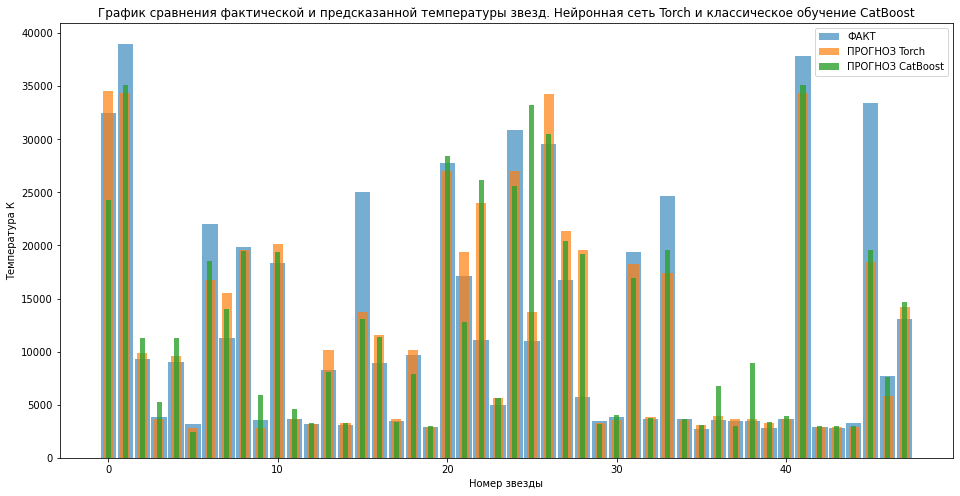

In [45]:
index = np.arange(48)
values1 = y_test_tensor.tolist()
values2 = test_preds_best.tolist()
values3 = predictions_valid_cr.round()
plt.figure(figsize=(16, 8))
plt.title('График сравнения фактической и предсказанной температуры звезд. '
          'Нейронная сеть Torch и классическое обучение CatBoost')
plt.bar(index, values1, alpha=0.6, label='ФАКТ', width=0.9)
plt.bar(index, values2, alpha=0.7, label='ПРОГНОЗ Torch', width=0.6)
plt.bar(index, values3, alpha=0.8, label='ПРОГНОЗ CatBoost', width=0.3)
plt.legend()
plt.xlabel('Номер звезды')
plt.ylabel('Температура К')
plt.show();


Да хорошо видно, что прогноз по температурам близким к 3000-4000 К наиболее точен. При этом есть несколько звезд для которых как нейронная модель, так и классическое обучение дает очень не точные результаты - видимо параметры сильно выбиваются из общих данных, и/или таких выбивающихся очень мало для нормального обучения.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Молодец, что построил график и сравнил с Catboost:)</div>

## Улучшение нейронной сети разбиением на батчи и введением регуляризации

<div class="alert alert-info"> <b>Комментарий студента:</b> Нахождение размера батча на валидационной выборке и прогнозирование на тестовой выборке.

Ниже изменения</div>

Для этого разобьем x_train на тренировочную и валидационную выборки

In [46]:
x_train_1, x_valid, y_train_1, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=12345)

In [47]:
x_train_1.shape

(153, 11)

In [48]:
x_valid.shape

(39, 11)

Делаем тензоры

In [49]:
x_train_1_tensor = torch.FloatTensor(x_train_1.values)
x_valid_tensor = torch.FloatTensor(x_valid.values)
y_train_1_tensor = torch.FloatTensor(y_train_1.values)
y_valid_tensor = torch.FloatTensor(y_valid.values)

### Добавление разбиения на батчи


#### Находим оптимальный размер батча на валидационной выборке

In [50]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
        # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
    
net = Net(11, 20, 20, 1) 
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss = nn.L1Loss()# инициализируйте функцию потерь

num_epochs = 2000
best_rmse1 = 10000
valid_preds_best1 = 0
best_batch = 0

for batch_size in range(10, 200, 20):

    num_batches = ceil(len(x_train_1_tensor)/batch_size)

    for epoch in range(num_epochs):
        order = np.random.permutation(len(x_train_1_tensor))# создайте случайную перестановку индексов объектов
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size# посчитайте номер стартового объекта батча
            optimizer.zero_grad()
  
            batch_indexes = order[start_index:start_index+batch_size]# извлеките индексы объектов текущего обатча
            X_batch = x_train_1_tensor[batch_indexes]
            y_batch = y_train_1_tensor[batch_indexes]
  
            preds = net.forward(X_batch).flatten()
             
            loss_value = loss(preds, y_batch)

            loss_value.backward()
            
            optimizer.step()    
    
   
        if epoch % 100 == 0 or epoch == num_epochs - 1:
            net.eval()
            valid_preds = net.forward(x_valid_tensor).flatten()
        
            rmse = mse()**0.5
            RMSE = rmse(valid_preds, y_valid_tensor)
    
            print(RMSE)
        
        if best_rmse1 > RMSE:
            best_rmse1 = torch.round(RMSE)
            valid_preds_best1 = torch.round(valid_preds)
            best_batch = batch_size
        

tensor(14301.2998, grad_fn=<PowBackward0>)
tensor(5668.2412, grad_fn=<PowBackward0>)
tensor(5545.4575, grad_fn=<PowBackward0>)
tensor(5711.0430, grad_fn=<PowBackward0>)
tensor(5575.4648, grad_fn=<PowBackward0>)
tensor(5505.8350, grad_fn=<PowBackward0>)
tensor(5508.0542, grad_fn=<PowBackward0>)
tensor(5738.8774, grad_fn=<PowBackward0>)
tensor(5504.9702, grad_fn=<PowBackward0>)
tensor(5710.3447, grad_fn=<PowBackward0>)
tensor(6053.8198, grad_fn=<PowBackward0>)
tensor(5672.4829, grad_fn=<PowBackward0>)
tensor(5826.8745, grad_fn=<PowBackward0>)
tensor(5787.8325, grad_fn=<PowBackward0>)
tensor(5113.8940, grad_fn=<PowBackward0>)
tensor(5005.9272, grad_fn=<PowBackward0>)
tensor(5014.7036, grad_fn=<PowBackward0>)
tensor(4728.3208, grad_fn=<PowBackward0>)
tensor(4822.3833, grad_fn=<PowBackward0>)
tensor(4631.2603, grad_fn=<PowBackward0>)
tensor(4978.8169, grad_fn=<PowBackward0>)
tensor(4898.5376, grad_fn=<PowBackward0>)
tensor(4441.6909, grad_fn=<PowBackward0>)
tensor(4468.1860, grad_fn=<PowBac

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Основная проблема в том, что ты по сути подбираешь параметр на тесте, то есть смотришь, что лучше взять, чтобы тест показал вот такой результат:( А это не честно, тут нужна валидационная выборка

А в самом конце лучше обучить train+valid(так как мало данных) и проверить на тесте 

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Но может быть что размер батча на урезанной тренировочной выборке находим наилучший, не факт что на полной тренировочной он будет лучший, кстати проверим это.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Да, из за того, что маленький датасет, могут быть проблемы

Кстати можно еще попробовать skorch:
+  https://skorch.readthedocs.io/en/stable/
+  https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/Basic_Usage.ipynb#scrollTo=c_UXuqUnqf6t
   
    
+  https://www.youtube.com/watch?v=fkgarZVbNhY&ab_channel=AyushChaurasia - правда на англ;(

</div>

Данные на валидацонной выборке

In [51]:
print()        
print('Лучшее RMSE: ', best_rmse1)
print()
print('Лучшее предсказание: ', valid_preds_best1)
print()
print('Тестовые данные: ', y_valid_tensor)   
print()
print('Лучший размер Батча: ', best_batch) 


Лучшее RMSE:  tensor(3731., grad_fn=<RoundBackward0>)

Лучшее предсказание:  tensor([12054.,  8010.,  3345., 25945.,  8734.,  3345., 11944., 27904.,  3317.,
         3782., 20618., 25537., 27427., 23050., 25443.,  3345.,  3663.,  3348.,
         2841.,  3346., 25526.,  2846., 12054., 15742., 23889., 12053.,  3368.,
        11786.,  2842.,  2835., 23837.,  2843.,  2955.,  2821.,  2822., 11376.,
        12392., 23241.,  3291.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([14520.,  9675.,  3129., 18000., 13420.,  3304., 12990., 24490.,  2983.,
         4526., 16390., 38234., 23092., 25070., 26373.,  3091.,  3575.,  3441.,
         2650.,  3243., 19923.,  3432., 11900., 23440., 23678., 17200.,  3257.,
        12749.,  3419.,  2840., 30000.,  2600.,  2861.,  3531.,  3511.,  5112.,
        14732., 28700.,  2831.])

Лучший размер Батча:  150


под конкретный набор данных выпал низкий RMSE, посмотрим что нам даст на тестовой выборке

#### Обучаем нейросеть на полной тренировочной выборке с размеров батча 150

In [52]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
        # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
    
net = Net(11, 20, 20, 1) 
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss = nn.L1Loss()# инициализируйте функцию потерь


num_epochs = 4000
best_rmse3 = 10000
test_preds_best1 = 0

batch_size = 150

num_batches = ceil(len(x_train_tensor)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(x_train_tensor))# создайте случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size# посчитайте номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index:start_index+batch_size]# извлеките индексы объектов текущего обатча
        X_batch = x_train_tensor[batch_indexes]
        y_batch = y_train_tensor[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
             
        loss_value = loss(preds, y_batch)

        loss_value.backward()
            
        optimizer.step()    
    
   
    if epoch % 20 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(x_test_tensor).flatten()
        
        rmse = mse()**0.5
        RMSE = rmse(test_preds, y_test_tensor)
    
        print(RMSE)
        
    if best_rmse3 > RMSE:
        best_rmse3 = torch.round(RMSE)
        test_preds_best1 = torch.round(test_preds)

tensor(15718.6426, grad_fn=<PowBackward0>)
tensor(13068.1006, grad_fn=<PowBackward0>)
tensor(12315.7324, grad_fn=<PowBackward0>)
tensor(10274.7998, grad_fn=<PowBackward0>)
tensor(9180.2500, grad_fn=<PowBackward0>)
tensor(8619.9453, grad_fn=<PowBackward0>)
tensor(8086.0986, grad_fn=<PowBackward0>)
tensor(7893.1460, grad_fn=<PowBackward0>)
tensor(7824.3628, grad_fn=<PowBackward0>)
tensor(7695.1484, grad_fn=<PowBackward0>)
tensor(7658.6006, grad_fn=<PowBackward0>)
tensor(7747.1675, grad_fn=<PowBackward0>)
tensor(7599.4897, grad_fn=<PowBackward0>)
tensor(7520.0718, grad_fn=<PowBackward0>)
tensor(7161.7451, grad_fn=<PowBackward0>)
tensor(6852.4243, grad_fn=<PowBackward0>)
tensor(6598.4712, grad_fn=<PowBackward0>)
tensor(6593.3618, grad_fn=<PowBackward0>)
tensor(6433.6323, grad_fn=<PowBackward0>)
tensor(6449.6587, grad_fn=<PowBackward0>)
tensor(6425.8618, grad_fn=<PowBackward0>)
tensor(6173.5991, grad_fn=<PowBackward0>)
tensor(6118.8540, grad_fn=<PowBackward0>)
tensor(5908.8872, grad_fn=<Pow

In [53]:
print()        
print('Лучшее RMSE: ', best_rmse3)
print()
print('Лучшее предсказание: ', test_preds_best1)
print()
print('Тестовые данные: ', y_test_tensor)   



Лучшее RMSE:  tensor(4634., grad_fn=<RoundBackward0>)

Лучшее предсказание:  tensor([30690., 33061., 13061.,  3714., 13050.,  2778., 16630., 15110., 19586.,
         3374., 20062.,  3760.,  3224.,  6807.,  3248., 12888., 13188.,  3713.,
         6822.,  2905., 24844., 18398., 23577.,  6026., 30836.,  3164., 35309.,
        18921., 18180.,  3232.,  3514., 18455.,  3448., 17754.,  3745.,  3003.,
         3819.,  3713.,  3761.,  3290.,  3734., 33145.,  2963.,  2944.,  2953.,
        17788.,  5849., 13898.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([32489., 39000.,  9320.,  3834.,  9030.,  3218., 22012., 11250., 19860.,
         3574., 18340.,  3614.,  3150.,  8250.,  3100., 25000.,  8945.,  3459.,
         9700.,  2945., 27739., 17120., 11096.,  4980., 30839., 11000., 29560.,
        16787.,  5752.,  3462.,  3826., 19360.,  3607., 24630.,  3615.,  2700.,
         3570.,  3450.,  3490.,  2799.,  3650., 37800.,  2889.,  2774.,  3323.,
        33421.,  7700., 13023.])


Не лучший результат

#### Обучаем нейросеть на не полной тренировочной выборке с размеров батча 150

In [54]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
        # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
    
net = Net(11, 20, 20, 1) 
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss = nn.L1Loss()# инициализируйте функцию потерь


num_epochs = 4000
best_rmse4 = 10000
test_preds_best3 = 0

batch_size = 150

num_batches = ceil(len(x_train_1_tensor)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(x_train_1_tensor))# создайте случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size# посчитайте номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index:start_index+batch_size]# извлеките индексы объектов текущего обатча
        X_batch = x_train_1_tensor[batch_indexes]
        y_batch = y_train_1_tensor[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
             
        loss_value = loss(preds, y_batch)

        loss_value.backward()
            
        optimizer.step()    
    
   
    if epoch % 50 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(x_test_tensor).flatten()
        
        rmse = mse()**0.5
        RMSE = rmse(test_preds, y_test_tensor)
    
        print(RMSE)
        
    if best_rmse4 > RMSE:
        best_rmse4 = torch.round(RMSE)
        test_preds_best3 = torch.round(test_preds)

tensor(15721.7842, grad_fn=<PowBackward0>)
tensor(11770.4648, grad_fn=<PowBackward0>)
tensor(9644.7139, grad_fn=<PowBackward0>)
tensor(8610.9795, grad_fn=<PowBackward0>)
tensor(8498.6221, grad_fn=<PowBackward0>)
tensor(7744.1201, grad_fn=<PowBackward0>)
tensor(7472.1079, grad_fn=<PowBackward0>)
tensor(7247.5571, grad_fn=<PowBackward0>)
tensor(7084.3389, grad_fn=<PowBackward0>)
tensor(7155.4702, grad_fn=<PowBackward0>)
tensor(6932.3154, grad_fn=<PowBackward0>)
tensor(6778.9585, grad_fn=<PowBackward0>)
tensor(6668.9790, grad_fn=<PowBackward0>)
tensor(6659.4717, grad_fn=<PowBackward0>)
tensor(6423.1812, grad_fn=<PowBackward0>)
tensor(6177.1514, grad_fn=<PowBackward0>)
tensor(7027.9419, grad_fn=<PowBackward0>)
tensor(6092.0938, grad_fn=<PowBackward0>)
tensor(6304.9595, grad_fn=<PowBackward0>)
tensor(6032.6880, grad_fn=<PowBackward0>)
tensor(6083.7900, grad_fn=<PowBackward0>)
tensor(5699.9854, grad_fn=<PowBackward0>)
tensor(5791.4263, grad_fn=<PowBackward0>)
tensor(6030.4390, grad_fn=<PowBa

In [55]:
print()        
print('Лучшее RMSE: ', best_rmse4)
print()
print('Лучшее предсказание: ', test_preds_best3)
print()
print('Тестовые данные: ', y_test_tensor)  


Лучшее RMSE:  tensor(4577., grad_fn=<RoundBackward0>)

Лучшее предсказание:  tensor([26112., 33669., 12061.,  3556., 12040.,  2688., 19776., 17876., 19831.,
         3555., 20154.,  3705.,  3000.,  9442.,  3019., 11989., 12382.,  3556.,
         9431.,  2730., 26137., 15922., 21683.,  5427., 25829., 18679., 26039.,
        16091., 15990.,  3008.,  3556., 19060.,  3156., 16704.,  3595.,  2790.,
         3600.,  3556.,  3581.,  2997.,  3561., 33846.,  2764.,  2752.,  2758.,
        16559.,  8164., 14599.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([32489., 39000.,  9320.,  3834.,  9030.,  3218., 22012., 11250., 19860.,
         3574., 18340.,  3614.,  3150.,  8250.,  3100., 25000.,  8945.,  3459.,
         9700.,  2945., 27739., 17120., 11096.,  4980., 30839., 11000., 29560.,
        16787.,  5752.,  3462.,  3826., 19360.,  3607., 24630.,  3615.,  2700.,
         3570.,  3450.,  3490.,  2799.,  3650., 37800.,  2889.,  2774.,  3323.,
        33421.,  7700., 13023.])


Не лучший результат явно. Видимо просто добавление батчей без поиска наилучших параметров и характеристик конкретной архитектуры не обойтись. Хотя предположение, что если находили оптимальный размер батча на меньшей тренировочной выборке, то останется оптимальным и для тестовой выборки, повышение состава на обучающей выборке показала результат хуже.

### Добавим регуляризацию Dropout сохранив размер батча в 150



<div class="alert alert-info"> <b>Комментарий студента:</b> Так же видимо нужно найти лучший параметр Dropout на валидационной выборке</div>

#### Находим оптимальный размер параметра Dropout на валидационной выборке

In [56]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons, dp):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.dp1 = nn.Dropout(p=dp/10)
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=dp/10)    
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
         # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.dp2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

    
num_epochs = 4000
best_rmse2 = 10000
valid_preds_best2 = 0
best_Dropout = 0   
    
for dp in range(4, 10, 1): 

    net = Net(11, 20, 20, 1, dp) 
    optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
    loss = nn.L1Loss()# инициализируйте функцию потерь

    batch_size = 150

    num_batches = ceil(len(x_train_1_tensor)/batch_size)

    for epoch in range(num_epochs):
        order = np.random.permutation(len(x_train_1_tensor))# создайте случайную перестановку индексов объектов
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size# посчитайте номер стартового объекта батча
            optimizer.zero_grad()
  
            batch_indexes = order[start_index:start_index+batch_size]# извлеките индексы объектов текущего обатча
            X_batch = x_train_tensor[batch_indexes]
            y_batch = y_train_tensor[batch_indexes]
  
            preds = net.forward(X_batch).flatten()
             
            loss_value = loss(preds, y_batch)

            loss_value.backward()
            
            optimizer.step()  
   
        if epoch % 100 == 0 or epoch == num_epochs - 1:
             net.eval()
             valid_preds = net.forward(x_valid_tensor).flatten()
        
             rmse = mse()**0.5
             RMSE = rmse(valid_preds, y_valid_tensor)
    
             print(RMSE)
        
        if best_rmse2 > RMSE:
            best_rmse2 = torch.round(RMSE)
            valid_preds_best2 = torch.round(valid_preds)
            best_Dropout = dp/10       


tensor(15171.3984, grad_fn=<PowBackward0>)
tensor(6902.2778, grad_fn=<PowBackward0>)
tensor(6820.9497, grad_fn=<PowBackward0>)
tensor(6773.9146, grad_fn=<PowBackward0>)
tensor(6399.1924, grad_fn=<PowBackward0>)
tensor(5490.9062, grad_fn=<PowBackward0>)
tensor(4817.6895, grad_fn=<PowBackward0>)
tensor(4576.9941, grad_fn=<PowBackward0>)
tensor(4251.1157, grad_fn=<PowBackward0>)
tensor(4657.1401, grad_fn=<PowBackward0>)
tensor(5546.1270, grad_fn=<PowBackward0>)
tensor(3801.8669, grad_fn=<PowBackward0>)
tensor(4345.2803, grad_fn=<PowBackward0>)
tensor(3632.3030, grad_fn=<PowBackward0>)
tensor(4015.3765, grad_fn=<PowBackward0>)
tensor(4736.4453, grad_fn=<PowBackward0>)
tensor(3579.1626, grad_fn=<PowBackward0>)
tensor(3428.9912, grad_fn=<PowBackward0>)
tensor(3380.4900, grad_fn=<PowBackward0>)
tensor(3456.3152, grad_fn=<PowBackward0>)
tensor(3625.4919, grad_fn=<PowBackward0>)
tensor(3447.4788, grad_fn=<PowBackward0>)
tensor(3440.0146, grad_fn=<PowBackward0>)
tensor(4148.9517, grad_fn=<PowBac

In [57]:
print()        
print('Лучшее RMSE: ', best_rmse2)
print()
print('Лучшее предсказание: ', valid_preds_best2)
print()
print('Тестовые данные: ', y_valid_tensor) 
print()
print('Лучший гиперпараметр Dropout: ', best_Dropout) 



Лучшее RMSE:  tensor(2628., grad_fn=<RoundBackward0>)

Лучшее предсказание:  tensor([12836., 12836.,  3544., 27232., 12836.,  3538., 15094., 25164.,  3150.,
         5569., 19565., 34706., 24394., 26229., 25431.,  3548.,  3736.,  3552.,
         3146.,  3536., 22106.,  3147., 12837., 13144., 24030., 12836.,  3564.,
        12768.,  3146.,  3147., 29268.,  3138.,  3148.,  3099.,  3147.,  5297.,
        13045., 27158.,  3149.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([14520.,  9675.,  3129., 18000., 13420.,  3304., 12990., 24490.,  2983.,
         4526., 16390., 38234., 23092., 25070., 26373.,  3091.,  3575.,  3441.,
         2650.,  3243., 19923.,  3432., 11900., 23440., 23678., 17200.,  3257.,
        12749.,  3419.,  2840., 30000.,  2600.,  2861.,  3531.,  3511.,  5112.,
        14732., 28700.,  2831.])

Лучший гиперпараметр Dropout:  0.6


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Класс из цикла вынеси, пожалуйста:) Просто передавай параметр dp в класс и все</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано</div>

Проверим работу нейросети с размером батча 150 и параметра Dropout 0.6. Так же посмотрим с обучением на этой же выборке, или полной выборке.

#### Обучение на меньшей тренировочной выборке

In [58]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons, dp):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.dp1 = nn.Dropout(p=dp)
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=dp)    
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
         # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.dp2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

    
num_epochs = 4000
best_rmse5 = 10000
test_preds_best5 = 0
dp = 0.6
    
net = Net(11, 20, 20, 1, dp) 
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss = nn.L1Loss()# инициализируйте функцию потерь

batch_size = 150

num_batches = ceil(len(x_train_1_tensor)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(x_train_1_tensor))# создайте случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size# посчитайте номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index:start_index+batch_size]# извлеките индексы объектов текущего обатча
        X_batch = x_train_tensor[batch_indexes]
        y_batch = y_train_tensor[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
             
        loss_value = loss(preds, y_batch)

        loss_value.backward()
            
        optimizer.step()  
   
    if epoch % 20 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(x_test_tensor).flatten()
        
        rmse = mse()**0.5
        RMSE = rmse(test_preds, y_test_tensor)
    
        print(RMSE)
        
    if best_rmse5 > RMSE:
        best_rmse5 = torch.round(RMSE)
        test_preds_best5 = torch.round(test_preds)     

tensor(15730.5400, grad_fn=<PowBackward0>)
tensor(13335.3643, grad_fn=<PowBackward0>)
tensor(13069.1045, grad_fn=<PowBackward0>)
tensor(11653.5732, grad_fn=<PowBackward0>)
tensor(10335.9424, grad_fn=<PowBackward0>)
tensor(9126.3076, grad_fn=<PowBackward0>)
tensor(9130.3154, grad_fn=<PowBackward0>)
tensor(8700.1543, grad_fn=<PowBackward0>)
tensor(8594.2852, grad_fn=<PowBackward0>)
tensor(8576.1611, grad_fn=<PowBackward0>)
tensor(8907.8291, grad_fn=<PowBackward0>)
tensor(7875.4297, grad_fn=<PowBackward0>)
tensor(7788.3540, grad_fn=<PowBackward0>)
tensor(7717.4346, grad_fn=<PowBackward0>)
tensor(7584.2891, grad_fn=<PowBackward0>)
tensor(7911.7529, grad_fn=<PowBackward0>)
tensor(7935.0693, grad_fn=<PowBackward0>)
tensor(7632.7144, grad_fn=<PowBackward0>)
tensor(7113.7334, grad_fn=<PowBackward0>)
tensor(7258.6504, grad_fn=<PowBackward0>)
tensor(7531.2349, grad_fn=<PowBackward0>)
tensor(7575.5015, grad_fn=<PowBackward0>)
tensor(7046.1899, grad_fn=<PowBackward0>)
tensor(7115.8901, grad_fn=<Po

In [59]:
print()        
print('Лучшее RMSE: ', best_rmse5)
print()
print('Лучшее предсказание: ', test_preds_best5)
print()
print('Тестовые данные: ', y_test_tensor)


Лучшее RMSE:  tensor(5861., grad_fn=<RoundBackward0>)

Лучшее предсказание:  tensor([19798., 34713., 12910.,  3544., 12911.,  3116., 16158., 14734., 19925.,
         3545., 20421.,  5288.,  3477., 14283.,  3506., 12926., 12919.,  3596.,
        13811.,  3120., 26828., 21031., 23688.,  5473., 12653., 24244., 36812.,
        22093., 19861.,  3491.,  3545., 18717.,  3669., 19884.,  3545.,  3123.,
         3544.,  3545.,  3544.,  3465.,  3544., 34762.,  3122.,  3121.,  3122.,
        20149.,  6185., 13317.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([32489., 39000.,  9320.,  3834.,  9030.,  3218., 22012., 11250., 19860.,
         3574., 18340.,  3614.,  3150.,  8250.,  3100., 25000.,  8945.,  3459.,
         9700.,  2945., 27739., 17120., 11096.,  4980., 30839., 11000., 29560.,
        16787.,  5752.,  3462.,  3826., 19360.,  3607., 24630.,  3615.,  2700.,
         3570.,  3450.,  3490.,  2799.,  3650., 37800.,  2889.,  2774.,  3323.,
        33421.,  7700., 13023.])


#### Обучение на большей тренеровочной выборке - np.random.seed(0)

In [60]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons, dp):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.dp1 = nn.Dropout(p=dp)
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=dp)    
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
         # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.dp2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

    
num_epochs = 4000
best_rmse7 = 10000
test_preds_best7 = 0
dp = 0.6
    
net = Net(11, 20, 20, 1, dp) 
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss = nn.L1Loss()# инициализируйте функцию потерь

batch_size = 150

num_batches = ceil(len(x_train_tensor)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(x_train_tensor))# создайте случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size# посчитайте номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index:start_index+batch_size]# извлеките индексы объектов текущего обатча
        X_batch = x_train_tensor[batch_indexes]
        y_batch = y_train_tensor[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
             
        loss_value = loss(preds, y_batch)

        loss_value.backward()
            
        optimizer.step()  
   
    if epoch % 20 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(x_test_tensor).flatten()
        
        rmse = mse()**0.5
        RMSE = rmse(test_preds, y_test_tensor)
    
        print(RMSE)
        
    if best_rmse7 > RMSE:
        best_rmse7 = torch.round(RMSE)
        test_preds_best7 = torch.round(test_preds)

tensor(15723.7246, grad_fn=<PowBackward0>)
tensor(13069.7031, grad_fn=<PowBackward0>)
tensor(12313.0195, grad_fn=<PowBackward0>)
tensor(10289.9424, grad_fn=<PowBackward0>)
tensor(9279.9961, grad_fn=<PowBackward0>)
tensor(8652.6729, grad_fn=<PowBackward0>)
tensor(7735.6001, grad_fn=<PowBackward0>)
tensor(7593.7617, grad_fn=<PowBackward0>)
tensor(7379.7725, grad_fn=<PowBackward0>)
tensor(7152.4141, grad_fn=<PowBackward0>)
tensor(7067.0332, grad_fn=<PowBackward0>)
tensor(7058.4507, grad_fn=<PowBackward0>)
tensor(6884.6655, grad_fn=<PowBackward0>)
tensor(6917.8320, grad_fn=<PowBackward0>)
tensor(6788.5493, grad_fn=<PowBackward0>)
tensor(6750.3696, grad_fn=<PowBackward0>)
tensor(6570.9600, grad_fn=<PowBackward0>)
tensor(6642.0874, grad_fn=<PowBackward0>)
tensor(6513.6577, grad_fn=<PowBackward0>)
tensor(6579.0425, grad_fn=<PowBackward0>)
tensor(6443.2534, grad_fn=<PowBackward0>)
tensor(5904.4946, grad_fn=<PowBackward0>)
tensor(5816.2300, grad_fn=<PowBackward0>)
tensor(5827.3467, grad_fn=<Pow

In [61]:
print()        
print('Лучшее RMSE: ', best_rmse7)
print()
print('Лучшее предсказание: ', test_preds_best7)
print()
print('Тестовые данные: ', y_test_tensor)


Лучшее RMSE:  tensor(4618., grad_fn=<RoundBackward0>)

Лучшее предсказание:  tensor([30679., 34250., 11839.,  3495., 11770.,  2863., 15841., 14396., 19092.,
         3490., 19535.,  3494.,  3145.,  7499.,  3184., 14034., 12175.,  3542.,
         7490.,  2953., 24676., 21394., 21705.,  5679., 26650., 20984., 29046.,
        21557., 21858.,  3156.,  3517., 18126.,  3528., 18665.,  3506.,  3034.,
         3519.,  3542.,  3504.,  3273.,  3505., 34261.,  3003.,  2987.,  2995.,
        19274.,  5094., 13025.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([32489., 39000.,  9320.,  3834.,  9030.,  3218., 22012., 11250., 19860.,
         3574., 18340.,  3614.,  3150.,  8250.,  3100., 25000.,  8945.,  3459.,
         9700.,  2945., 27739., 17120., 11096.,  4980., 30839., 11000., 29560.,
        16787.,  5752.,  3462.,  3826., 19360.,  3607., 24630.,  3615.,  2700.,
         3570.,  3450.,  3490.,  2799.,  3650., 37800.,  2889.,  2774.,  3323.,
        33421.,  7700., 13023.])


#### Обучение на большей тренеровочной выборке - np.random.seed(19191919)

In [83]:
random.seed(0)
np.random.seed(19191919)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons, dp):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.dp1 = nn.Dropout(p=dp)
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=dp)    
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)        
        self.act3 = nn.ReLU()
        
         # Инициализация весов
        nn.init.uniform_(self.fc1.weight, a=-1, b=1)
        nn.init.uniform_(self.fc1.bias, a=-1, b=3)
        nn.init.uniform_(self.fc2.weight, b=3)
        nn.init.uniform_(self.fc2.bias, a=-1)
        nn.init.uniform_(self.fc3.weight, b=2)
        nn.init.uniform_(self.fc3.bias, a=-1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.dp2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

    
num_epochs = 4000
best_rmse6 = 10000
test_preds_best6 = 0
dp = 0.6
    
net = Net(11, 20, 20, 1, dp) 
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss = nn.L1Loss()# инициализируйте функцию потерь

batch_size = 150

num_batches = ceil(len(x_train_tensor)/batch_size)

for epoch in range(num_epochs):
    order = np.random.permutation(len(x_train_tensor))# создайте случайную перестановку индексов объектов
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size# посчитайте номер стартового объекта батча
        optimizer.zero_grad()
  
        batch_indexes = order[start_index:start_index+batch_size]# извлеките индексы объектов текущего обатча
        X_batch = x_train_tensor[batch_indexes]
        y_batch = y_train_tensor[batch_indexes]
  
        preds = net.forward(X_batch).flatten()
             
        loss_value = loss(preds, y_batch)

        loss_value.backward()
            
        optimizer.step()  
   
    if epoch % 20 == 0 or epoch == num_epochs - 1:
        net.eval()
        test_preds = net.forward(x_test_tensor).flatten()
        
        rmse = mse()**0.5
        RMSE = rmse(test_preds, y_test_tensor)
    
        print(RMSE)
        
    if best_rmse6 > RMSE:
        best_rmse6 = torch.round(RMSE)
        test_preds_best6 = torch.round(test_preds)

tensor(15721.9746, grad_fn=<PowBackward0>)
tensor(13057.1963, grad_fn=<PowBackward0>)
tensor(12376.7354, grad_fn=<PowBackward0>)
tensor(10505.0654, grad_fn=<PowBackward0>)
tensor(9102.5791, grad_fn=<PowBackward0>)
tensor(8249.4688, grad_fn=<PowBackward0>)
tensor(8004.4639, grad_fn=<PowBackward0>)
tensor(7541.0068, grad_fn=<PowBackward0>)
tensor(7480.0239, grad_fn=<PowBackward0>)
tensor(7246.0620, grad_fn=<PowBackward0>)
tensor(6924.1973, grad_fn=<PowBackward0>)
tensor(6733.3042, grad_fn=<PowBackward0>)
tensor(6625.8188, grad_fn=<PowBackward0>)
tensor(6523.7900, grad_fn=<PowBackward0>)
tensor(6322.8628, grad_fn=<PowBackward0>)
tensor(6069.2241, grad_fn=<PowBackward0>)
tensor(5996.1152, grad_fn=<PowBackward0>)
tensor(5923.9785, grad_fn=<PowBackward0>)
tensor(5779.9341, grad_fn=<PowBackward0>)
tensor(5513.4937, grad_fn=<PowBackward0>)
tensor(5418.1445, grad_fn=<PowBackward0>)
tensor(5448.1797, grad_fn=<PowBackward0>)
tensor(5351.0898, grad_fn=<PowBackward0>)
tensor(5120.0142, grad_fn=<Pow

In [84]:
print()        
print('Лучшее RMSE: ', best_rmse6)
print()
print('Лучшее предсказание: ', test_preds_best6)
print()
print('Тестовые данные: ', y_test_tensor)


Лучшее RMSE:  tensor(4494., grad_fn=<RoundBackward0>)

Лучшее предсказание:  tensor([32992., 32344., 12516.,  3703., 12553.,  2763., 14329., 13137., 19220.,
         3688., 19590.,  3761.,  3273.,  9759.,  3342., 12970., 12331.,  3691.,
         9467.,  2955., 25134., 17307., 21661.,  5095., 25084., 13746., 32527.,
        17430., 17139.,  3298.,  3695., 18389.,  3877., 16580.,  3723.,  3018.,
         3778.,  3695.,  3737.,  3339.,  3726., 32470.,  3000.,  2989.,  2995.,
        16606.,  6001., 12415.], grad_fn=<RoundBackward0>)

Тестовые данные:  tensor([32489., 39000.,  9320.,  3834.,  9030.,  3218., 22012., 11250., 19860.,
         3574., 18340.,  3614.,  3150.,  8250.,  3100., 25000.,  8945.,  3459.,
         9700.,  2945., 27739., 17120., 11096.,  4980., 30839., 11000., 29560.,
        16787.,  5752.,  3462.,  3826., 19360.,  3607., 24630.,  3615.,  2700.,
         3570.,  3450.,  3490.,  2799.,  3650., 37800.,  2889.,  2774.,  3323.,
        33421.,  7700., 13023.])


### Сравнение Факт - Прогноз, график.

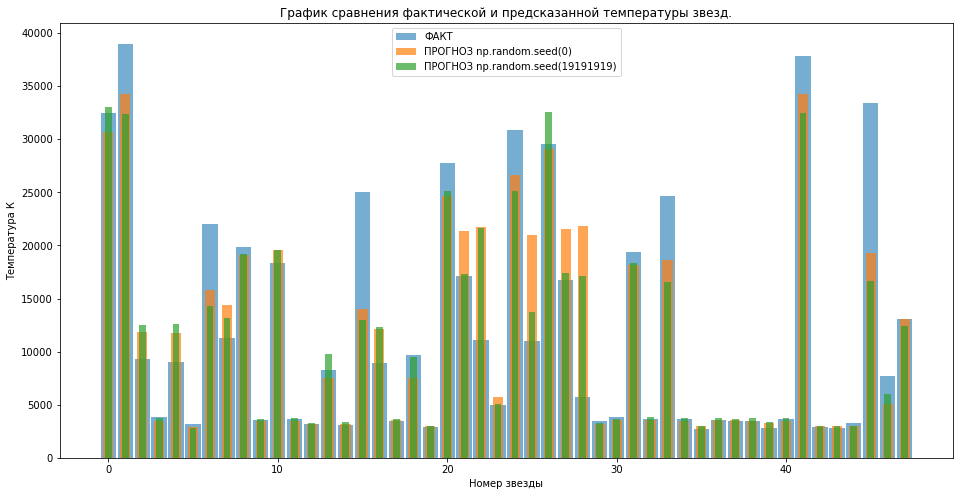

In [87]:
index = np.arange(48)
values1 = y_test_tensor.tolist()
values2 = test_preds_best7.tolist()
values3 = test_preds_best6.tolist()
plt.figure(figsize=(16, 8))
plt.title('График сравнения фактической и предсказанной температуры звезд.')
plt.bar(index, values1, alpha=0.6, label='ФАКТ', width=0.9)
plt.bar(index, values2, alpha=0.7, label='ПРОГНОЗ np.random.seed(0)', width=0.6)
plt.bar(index, values3, alpha=0.7, label='ПРОГНОЗ np.random.seed(19191919)', width=0.4)
plt.legend()
plt.xlabel('Номер звезды')
plt.ylabel('Температура К')
plt.show();

Мда уж видим еще и влияние показателя np.random.seed

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Да, из за того, что маленький датасет, влияние выборки тоже присутствует:) На больших данных будет очень маленький эффект от np.random.seed</div>

## Сравнение метрик RMSE и параметров

In [88]:
compare = pd.DataFrame(data=[['Лучший RMSE', result_cr, best_rmse.tolist(), best_rmse3.tolist(),
                              best_rmse7.tolist(),best_rmse6.tolist()],
                            ['Лучший размер Батча', 'Нет', 'Нет', best_batch, best_batch, best_batch],
                            ['Лучший параметр Dropout', 'Нет', 'Нет', 'Нет', best_Dropout, best_Dropout]],
                   columns=['Параметр','Классика CatBoostRegressor', 'Базовое обучение нейросети - ручной подбор параметров',
                            'Обучение нейросети с батчами',
                            'Обучение нейросети с батчами и Dropout np.random.seed(0)',
                            'Обучение нейросети с батчами и Dropout np.random.seed(19191919)'])
display(compare)

,Параметр,Классика CatBoostRegressor,Базовое обучение нейросети - ручной подбор параметров,Обучение нейросети с батчами,Обучение нейросети с батчами и Dropout np.random.seed(0),Обучение нейросети с батчами и Dropout np.random.seed(19191919)
0,Лучший RMSE,5604.81,4425,4634,4618.0,4494.0
1,Лучший размер Батча,Нет,Нет,150,150.0,150.0
2,Лучший параметр Dropout,Нет,Нет,Нет,0.6,0.6


## <b>Общие выводы</b>

* В таблице всего 240 строк и наибольшее количество звезд по показателям ближе к земному Солнцу - мало данных с большими параметрами.


* Именно в диапазоне ближе к Солнечным наблюдается наибольшая точность предсказаний


* При надлежащем терпении, по подбору различных параметров нейросети, можно уже на базовой модели достигнуть высоких показателей точности предсказаний:


* Точность предсказаний модели нейросети выше точности предсказаний классического обучения


* Введение разбияние на батчи и регуляризации Dropout без поиска других оптимаьных параметров обучения и сети даже ухудшило точность предсказаний, видимо из-за малого количества обучающих данных, очень сильно влияение выбора обучающей выборки данных - какие данные в обучающих выборках, в валидационной и тестовой.



* np.random.seed и прочие фиксирующие случайности могут выступать как еще одни параметры обучения нейросети

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Немного полезного материала:    

1) Интересный контент вот здесь есть: https://neural-university.ru/ - институт нейросетей. <br>
2) Ребята из-за "бугра": https://www.reg.ru/blog/stenfordskij-kurs-lekciya-1-vvedenie/ (тут про свёрточные, но интересно)<br>
3) Интересная статья специалиста Тесла: https://karpathy.github.io/neuralnets/ <br>
4) Список книг на выбор: https://habr.com/ru/company/neurodatalab/blog/336218/ <br>



Кстати есть еще нейросеть TabNet, которая заточена для работы с табличными данными:
+  https://habr.com/ru/post/540736/    
+  https://www.kaggle.com/code/carlmcbrideellis/tabnet-a-very-simple-regression-example/notebook

</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Роман, получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Да в общем то в процессе изучения проясняется много всяких вопросов, но основное понимание, что нейросети какая то область черного ящика - методы работают, нашли эмпирическим путем, а почему работают непонятно пока))))</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> 
    
    
Кстати есть еще нейросеть TabNet, которая заточена для работы с табличными данными:
    
+  https://habr.com/ru/post/540736/    
+  https://www.kaggle.com/code/carlmcbrideellis/tabnet-a-very-simple-regression-example/notebook


Удачи в следующих проектах!!!
    
    
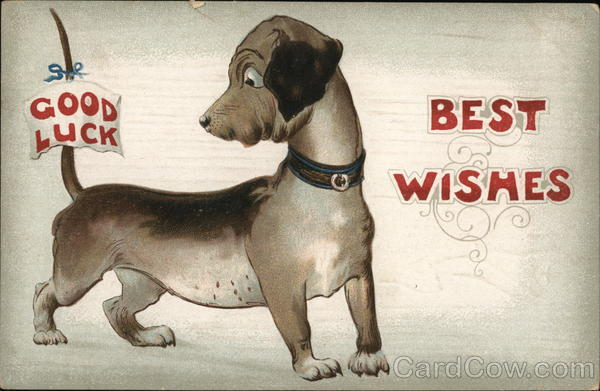

</div>